In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
#from sklearn import linear_model
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

In [89]:
from WinesDatasetCleaning import wine_dataset_cleaning as wdc
wines_dataset = wdc()

In [90]:
# Dropping unnecessary columns:
wines_dataset.drop(columns=["country",
                            "apellation",
                            "taster_name",
                            "taster_twitter_handle",
                            "title",
                            "variety",
                            "winery",
                            "noble_international",
                            "monovarietal",
                            "taste_alcohol",
                            "primary_flavors",
                            "title_new"], inplace=True)

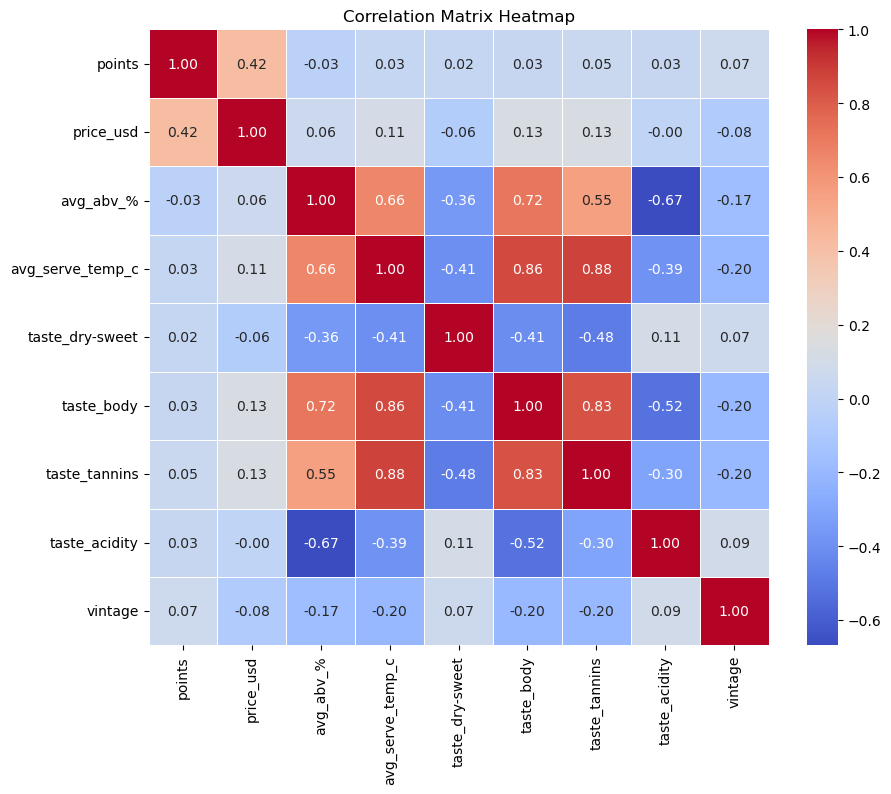

In [91]:
# Correlation matrix between categories:
plt.figure(figsize=(10, 8))
sns.heatmap(wines_dataset.drop(columns=["wine_type"]).corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidth=0.5,
            cbar=True)
plt.title("Correlation Matrix Heatmap")

plt.show()

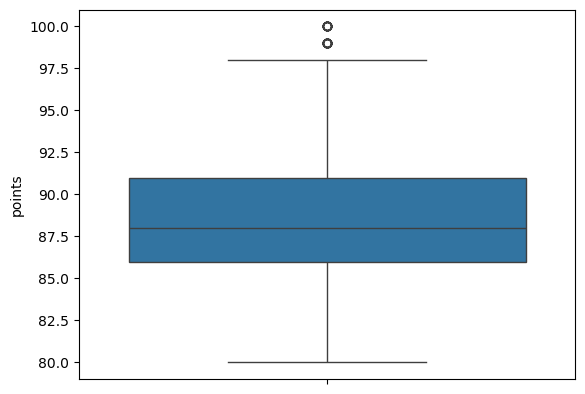

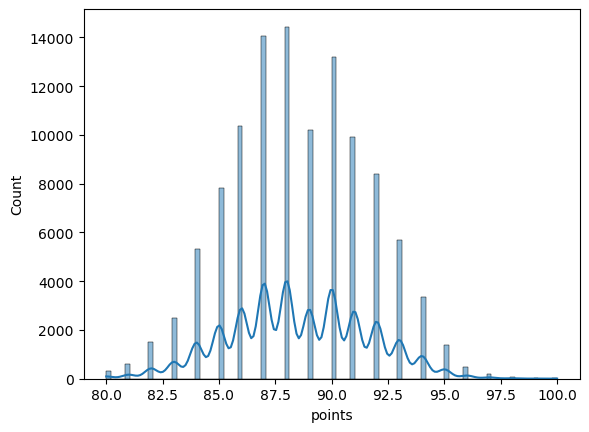

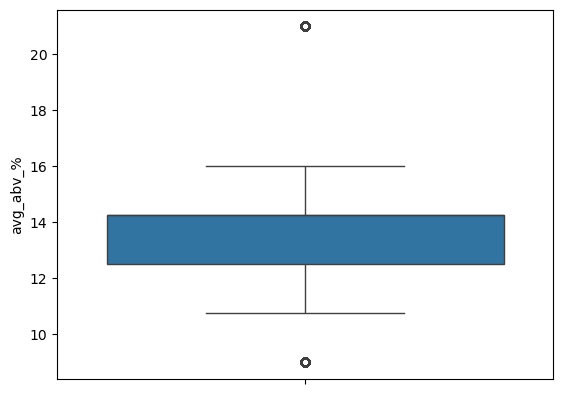

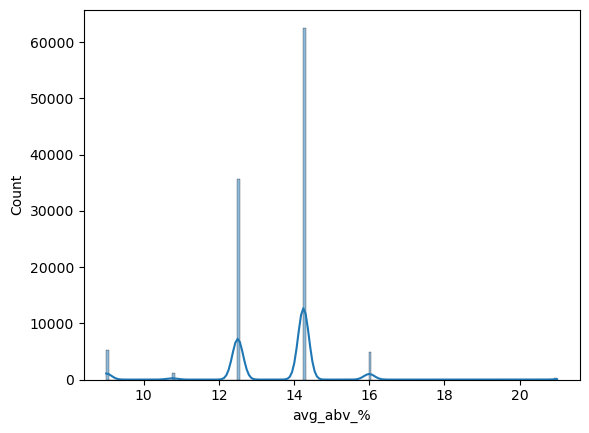

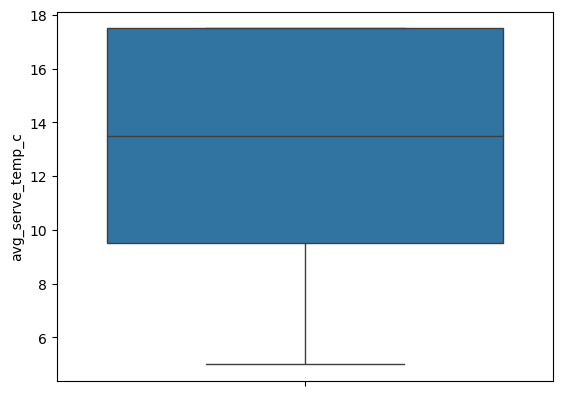

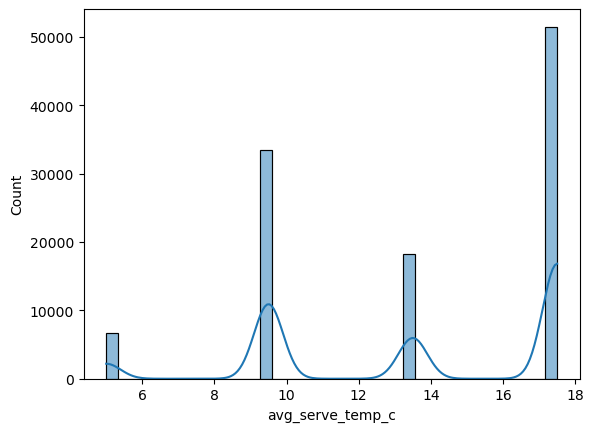

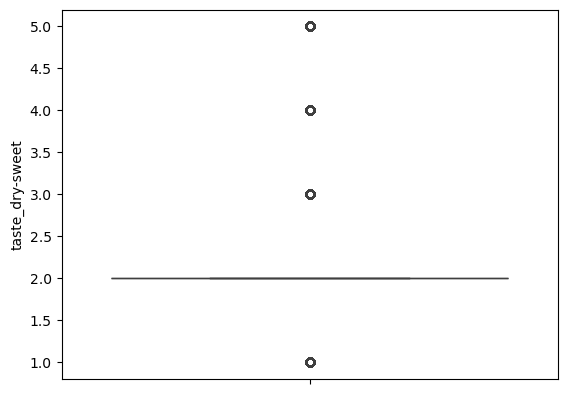

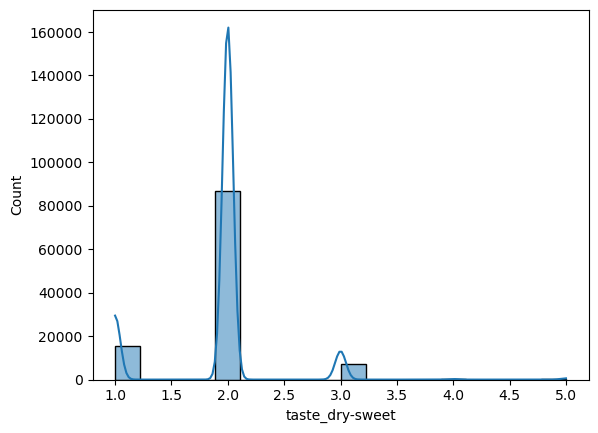

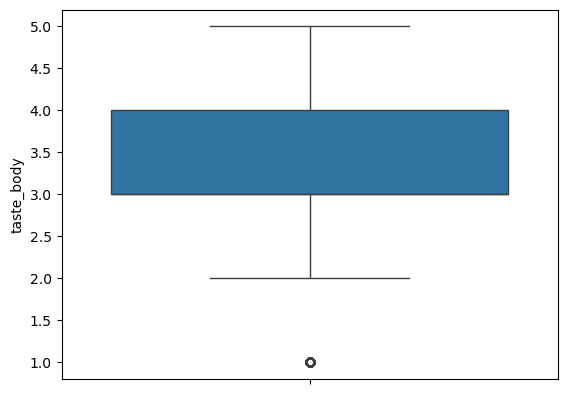

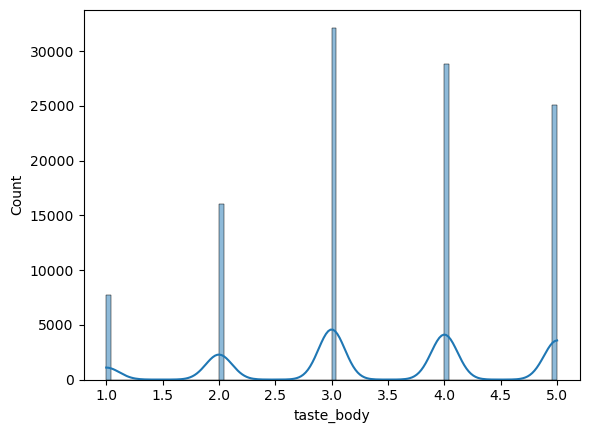

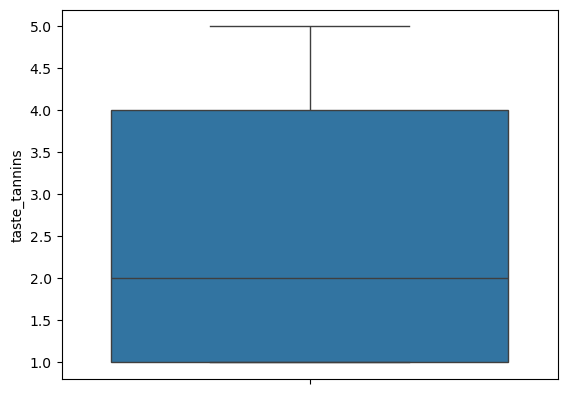

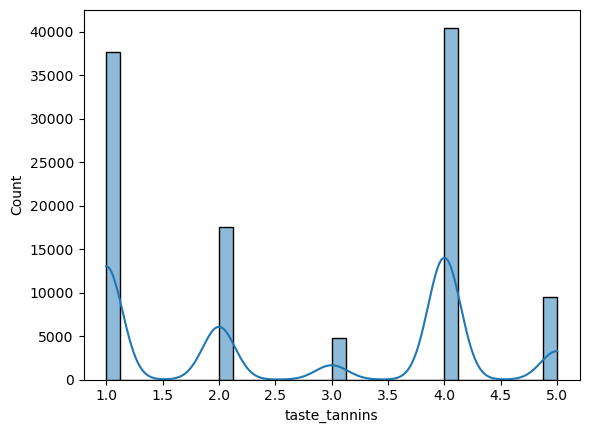

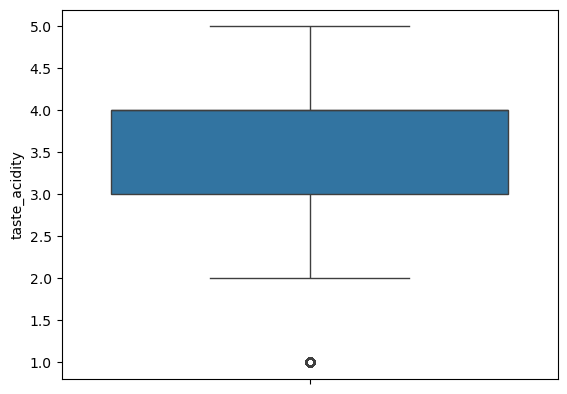

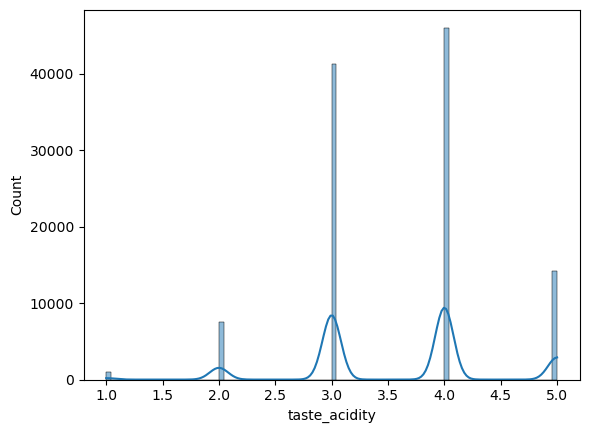

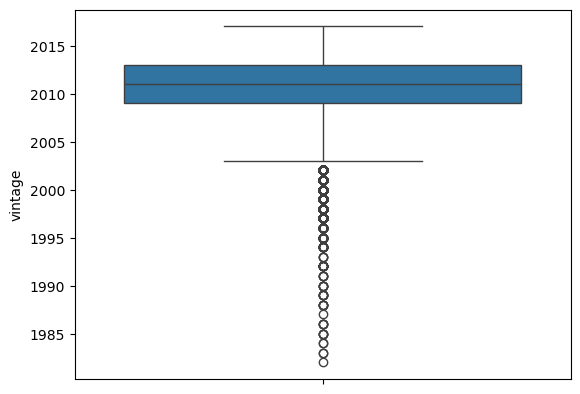

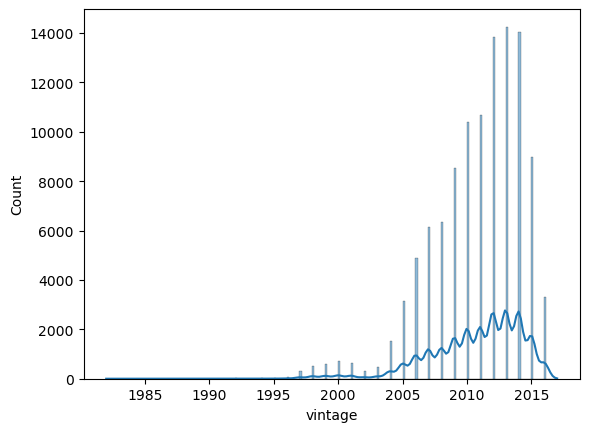

In [92]:
for column in wines_dataset.columns:
    if column != "price_usd" and column != "wine_type":
        sns.boxplot(y=wines_dataset[column])
        plt.show()
        sns.histplot(wines_dataset[column], kde=True)
        plt.show()

In [93]:
wines_predictor = wines_dataset[wines_dataset["vintage"] >= 2003] 

In [ ]:
# Defining the dependent variable:
y = wines_predictor["price_usd"]
wines_predictor.drop(columns=["price_usd"], inplace=True)

In [ ]:
# Defining the independent variables: 
X_num = wines_predictor.select_dtypes(np.number)     # It takes all "numerical" variables
X_cat = wines_predictor.select_dtypes(object)     # It takes all "categorical" variables

In [ ]:
# Scaling "numerical" variables:
optimusprime = StandardScaler().fit(X_num)
x_standardized = optimusprime.transform(X_num)

In [97]:
# Getting dummies for "categorical" variables:
dummies = pd.get_dummies(X_cat, drop_first=True)
dummies

,wine_type_Rosé,wine_type_Sparkling,wine_type_White
0,False,False,False
1,False,False,True
2,False,False,False
3,False,False,True
4,False,False,True
...,...,...,...
109866,False,False,True
109867,False,False,False
109868,False,False,True
109869,False,False,True


In [100]:
# Encoding "categorical" variables:
encoder = OneHotEncoder(handle_unknown="error", drop="first").fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoder.categories_

[array(['Red', 'Rosé', 'Sparkling', 'White'], dtype=object)]

In [103]:
# Concatenating both "X_num" and "X_cat" variables:
X = np.concatenate((encoded, x_standardized), axis=1)

In [104]:
# Splitting data between "train" and "test":
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Linear Regression (+Ridge+Lasso)

In [111]:
# **1️⃣ Simple Linear Regression**:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)
mse_lm = mean_squared_error(y_test, y_pred_lm)
r2_lm = r2_score(y_test, y_pred_lm)


# **2️⃣ Ridge (with penalty L2)**:
ridge = Ridge(alpha=1.0)  # Alpha controls the strength of the penalty -> The higher the alpha, the more reduced the coefficients are! 
# An alpha = 0 is the same as "Linear" - Most common are: 0.01, 0.1, 1, 10, 100!
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


# **3️⃣ Lasso (with penalty L1)**:
lasso = Lasso(alpha=0.1)  # Alpha controls the strength of the penalty -> The higher the alpha, the more the insignificance of variables becomes polarized!
# An alpha = 0 is the same as "Linear" - Most common are: 0.0001, 0.001, 0.01, 0.1, 1!
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)



# Show the coefficients, intercept and metrics of each model:
# The intercept is the predicted value of the dependent variable (y) when the independent variables (Xs) are 0!
print("📘 Linear Regression:")
print(f"MSE (Error Cuadrático Medio): {mse_lm:.4f}")
print(f"R2 (Coeficiente de Determinación): {r2_lm:.4f}\n")

print("📘 Ridge:")
print(f"MSE (Error Cuadrático Medio): {mse_ridge:.4f}")
print(f"R2 (Coeficiente de Determinación): {r2_ridge:.4f}\n")

print("📘 Lasso:")
print(f"MSE (Error Cuadrático Medio): {mse_lasso:.4f}")
print(f"R2 (Coeficiente de Determinación): {r2_lasso:.4f}\n")

📘 Linear Regression:
MSE (Error Cuadrático Medio): 1330.4493
R2 (Coeficiente de Determinación): 0.2066

📘 Ridge:
MSE (Error Cuadrático Medio): 1330.4494
R2 (Coeficiente de Determinación): 0.2066

📘 Lasso:
MSE (Error Cuadrático Medio): 1333.2290
R2 (Coeficiente de Determinación): 0.2049



# Support Vector Regressor

In [112]:
# Generate synthetic data.
# Create and train a SVR model with kernel "rbf" (for no linearity); it can be "linear" or "poly"...
# For non-linear..."sigmoid" is also used for logistic relations.
svr = SVR(kernel="linear", C=10, epsilon=0.1) 
# C -> Low vs High -> General (soft) or Precised adjustment (Be careful with overfitting!). 
# Poly -> Degree -> It controls the degree of the polynomial (2, 3, 4, 5).
# Gamma (all, but linear) -> It controls the influence of each point:
    # Low Gamma (0.01) -> Distant points have more influence! 
    # High Gamma (1, 10) -> Nearby points have more influence! (Be careful with overfitting!). "scale", "auto"...or 0.01, 0.1, 1
# Epsilon: It ignores errors; the higher, the more it ignores!


svr.fit(X_train, y_train)


# Predictions:
y_pred = svr.predict(X_test)


# Evaluate performance:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Error Cuadrático Medio): {mse:.4f}')
print(f'R2 (Coeficiente de Determinación): {r2:.4f}')

MSE (Error Cuadrático Medio): 1417.6810
R2 (Coeficiente de Determinación): 0.1546


# Random Forest Regressor

In [113]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

rfr.fit(X_train, y_train)

# Predictions:
y_pred = rfr.predict(X_test)

# Evaluate performance:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Error Cuadrático Medio): {mse:.4f}')
print(f'R2 (Coeficiente de Determinación): {r2:.4f}')

MSE (Error Cuadrático Medio): 1221.5389
R2 (Coeficiente de Determinación): 0.2715


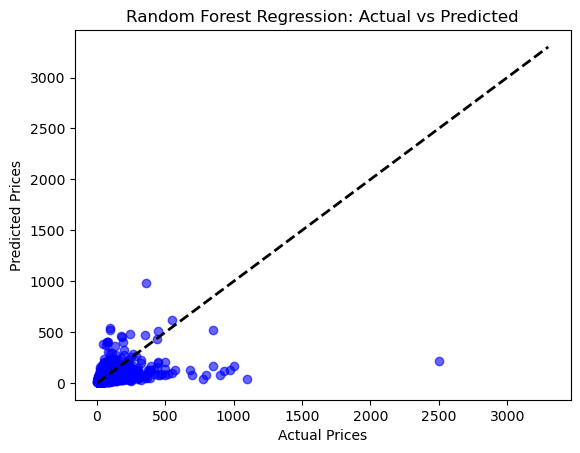

In [114]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()